# Data Visualization with Python3

Visualizing data helps the viewer to understand the distribution, trend, relationship, comparison and composition of data. In this sample I am using Matplotlib to create publication-quality figures from the Pima Indian Diabetes study data, which can be found in the [UCI Machine Learning Reporitory](http://archive.ics.uci.edu/ml/datasets.html).

## Importing the tools

In [17]:
import matplotlib.pyplot as plt     # 2D and 3D plotting for python
import pandas as pd                 # Data analysis library
import seaborn as sns               # Seaborn offers themes for visualizing uni-/bivariate, linear regression, matrixes etc.

df_original = pd.read_csv("./pima-data-orig.csv")
df = pd.DataFrame()
df = df_original[:10]

### Checking the dataframe

In [2]:
df.head(5)

,num_preg,glucose_conc,diastolic_bp,skin_thickness,insulin,bmi,diab_pred,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Histogram

Age distribution in complete dataset.

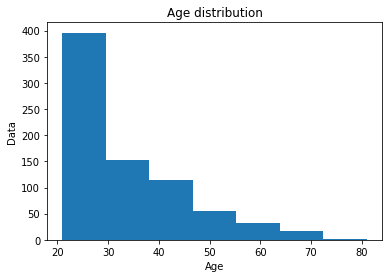

In [4]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.hist(df['age'], bins = 7)
plt.title('Age distribution')
plt.xlabel('Age')
plt.ylabel('Data')
plt.show()

## Box Plot

Number of pregnancies shown as a box plot.

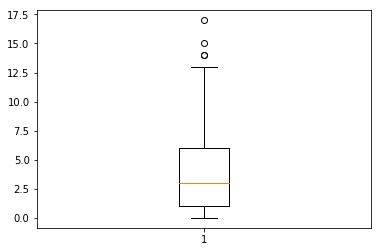

In [7]:
fig2 = plt.figure()
ax = fig2.add_subplot(1,1,1)
ax.boxplot(df['num_preg'])
plt.show()

## Violin Plot

Glucose concentration displayed as a violin plot.

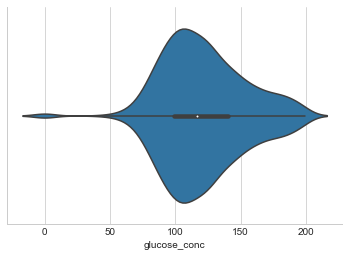

In [12]:
sns.set_style("whitegrid")
sns.violinplot(df['glucose_conc'])
sns.despine()

## Bar Chart

Diabetes displayed in a bar chart.

C:\Users\Mast900\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


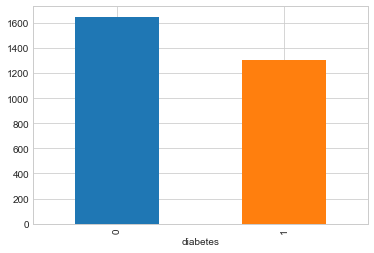

In [14]:
var = df.groupby('diabetes').num_preg.sum()

fig3 = plt.figure()
ax1 = fig.add_subplot(1,1,1)
ax1.set_xlabel('Diabetes')
ax1.set_ylabel('Sum of Number of Pregnancies')
ax1.set_title("Number of Pregnancies and Diabetes")
var.plot(kind='bar')

## Line Chart

Diabetes predictions by age.

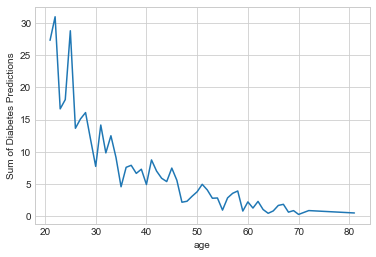

In [15]:
var2 = df.groupby('age').diab_pred.sum()
fig4 = plt.figure()
ax2 = fig4.add_subplot(1,1,1)
ax2.set_xlabel('Age')
ax2.set_ylabel('Sum of Diabetes Predictions')
ax1.set_title('Age wise Sum of Diabetes Predictions')
var2.plot(kind='line')

## Stacked Column Chart

### NOTE: Here I cleaned up the dataframe to be only the first 10 values of the original dataset, since some of the figured would otherwise become unreadable.

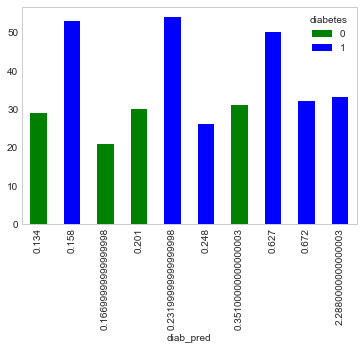

In [18]:
var3 = df.groupby(['diab_pred', 'diabetes']).age.sum()
var3.unstack().plot(kind='bar', stacked=True, color=['green', 'blue'], grid=False)

## Scatter Plot

Glucose concentration by age.

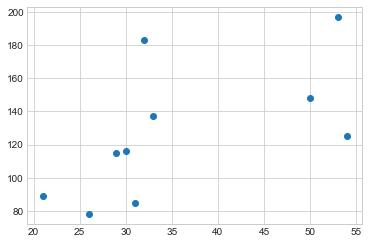

In [20]:
fig5 = plt.figure()
ax5 = fig5.add_subplot(1,1,1)
ax5.scatter(df['age'], df['glucose_conc'])
plt.show()

## Bubble Plot

Scatter by age and diastolic blood pressure, bubble by glucose concentration.

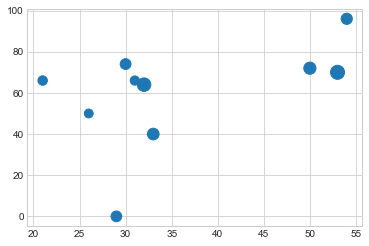

In [24]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
ax.scatter(df['age'], df['diastolic_bp'], s=df['glucose_conc'])
plt.show()

## Pie Chart

Pie chart of diabetes in sample data.

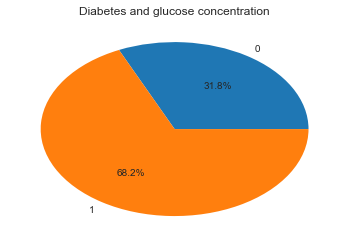

In [30]:
var = df.groupby(['diabetes']).sum().stack()
temp = var.unstack()
type(temp)
x_list = temp['glucose_conc']
label_list = temp.index
#axis("equal")                # Curiousely enough the pie chart is oval shape by default! Now round.
plt.pie(x_list, labels=label_list, autopct="%1.1f%%")
plt.title("Diabetes and glucose concentration")
plt.show()